# ASARCO DATA SCIENTIST ASSESSMENT

In [502]:
#importing all the necessary libraries required for the assessment 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import plotly.express as px
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score

## INITIAL OVERVIEW OF THE DATASET 

In [503]:
#reading the data 
telc = pd.read_csv("Telconnect_data.csv")
telc

,customerID,gender,SeniorCitizen,Has_Partner,Has_Dependents,account_tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [504]:
telc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Has_Partner       7043 non-null   object 
 4   Has_Dependents    7043 non-null   object 
 5   account_tenure    7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [505]:
#total charges has a datatype object - will convert it into float64 like MonthlyCharges
telc['TotalCharges'] = pd.to_numeric(telc['TotalCharges'], errors='coerce')

In [506]:
#dropping rows with NaN/missing values
telc.dropna(inplace=True)

In [507]:
telc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Has_Partner       7032 non-null   object 
 4   Has_Dependents    7032 non-null   object 
 5   account_tenure    7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

### Splitting the dataset into train test split 


- The reason behind splitting the dataset at the start is to ensure a fair evaluation and prevent data leakage - it also ensures reproducibility and consistency.
- To ensure consistency of ratio between the target attribute we will be using **Stratified Train-test split**

In [508]:
# Separate features (X) and target (y)
X = telc.drop('Churn', axis=1)  # Replace 'target_variable' with your target column name
y = telc['Churn']

# Perform stratified train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42  # Use a random_state for reproducibility
)

# Combine features and target back for saving
train_telc = pd.concat([X_train, y_train], axis=1)
test_telc = pd.concat([X_test, y_test], axis=1)

# Save to CSV files
train_telc.to_csv('train_data.csv', index=False)
test_telc.to_csv('test_data.csv', index=False)

print("Train data shape:", train_telc.shape)
print("Test data shape:", test_telc.shape)

Train data shape: (4922, 21)
Test data shape: (2110, 21)


In [509]:
#w.r.t. TRAIN DATA
telcchurn = train_telc[train_telc['Churn']=='Yes']     #telcchurn -> Dataset Where the churn is YES 
telcNOchurn = train_telc[train_telc['Churn']=='No']    #telcNOchurn -> Dataset where the churn is NO 

## Exploratory Data Analysis


In [510]:
train_telc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4922 entries, 4499 to 272
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        4922 non-null   object 
 1   gender            4922 non-null   object 
 2   SeniorCitizen     4922 non-null   int64  
 3   Has_Partner       4922 non-null   object 
 4   Has_Dependents    4922 non-null   object 
 5   account_tenure    4922 non-null   int64  
 6   PhoneService      4922 non-null   object 
 7   MultipleLines     4922 non-null   object 
 8   InternetService   4922 non-null   object 
 9   OnlineSecurity    4922 non-null   object 
 10  OnlineBackup      4922 non-null   object 
 11  DeviceProtection  4922 non-null   object 
 12  TechSupport       4922 non-null   object 
 13  StreamingTV       4922 non-null   object 
 14  StreamingMovies   4922 non-null   object 
 15  Contract          4922 non-null   object 
 16  PaperlessBilling  4922 non-null   object 
 17

In [511]:
print("Churned Customers (Yes):")
print(telcchurn.describe())

print("\nNon-Churned Customers (No):")
print(telcNOchurn.describe())


Churned Customers (Yes):
       SeniorCitizen  account_tenure  MonthlyCharges  TotalCharges
count    1308.000000     1308.000000     1308.000000   1308.000000
mean        0.256116       18.194190       74.884442   1561.420222
std         0.436654       19.956277       24.698990   1940.835940
min         0.000000        1.000000       19.100000     19.100000
25%         0.000000        2.000000       56.100000    130.812500
50%         0.000000        9.500000       80.075000    684.250000
75%         1.000000       29.000000       94.500000   2366.125000
max         1.000000       72.000000      118.350000   8684.800000

Non-Churned Customers (No):
       SeniorCitizen  account_tenure  MonthlyCharges  TotalCharges
count    3614.000000     3614.000000     3614.000000   3614.000000
mean        0.128666       37.664361       61.210390   2556.317723
std         0.334877       24.052495       31.250623   2332.675315
min         0.000000        1.000000       18.400000     18.800000
25%     

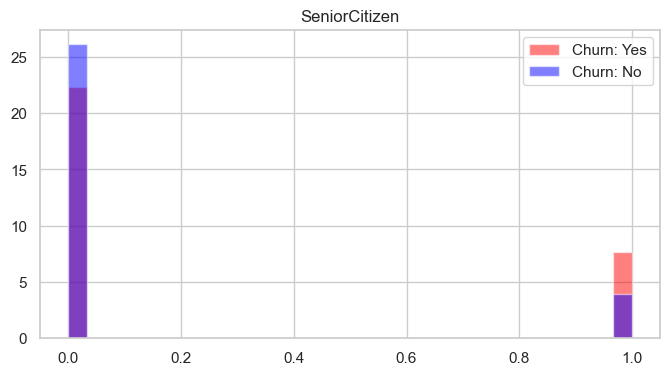

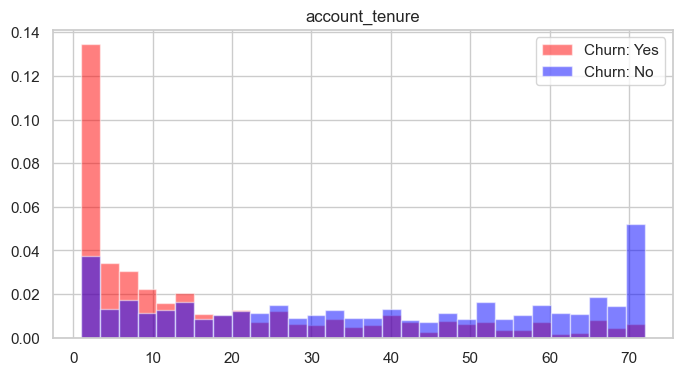

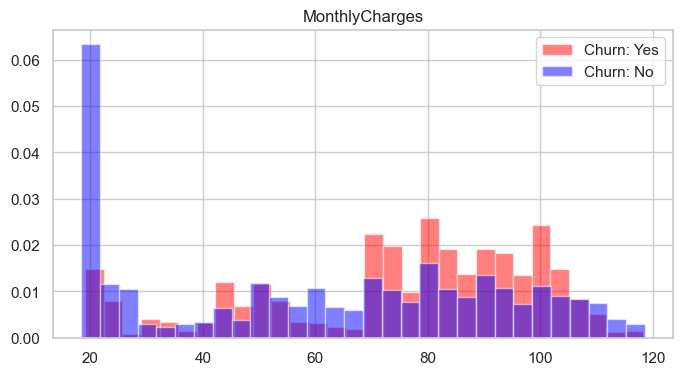

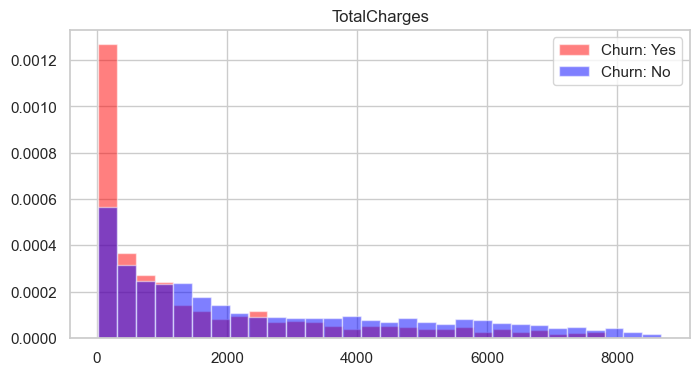

In [512]:
for col in telcchurn.select_dtypes(include=['int64', 'float64']).columns:
    plt.figure(figsize=(8,4))
    plt.hist(telcchurn[col], bins=30, alpha=0.5, label="Churn: Yes", color='red', density=True)
    plt.hist(telcNOchurn[col], bins=30, alpha=0.5, label="Churn: No", color='blue', density=True)
    plt.title(col)
    plt.legend()
    plt.show()


<Figure size 1000x500 with 0 Axes>

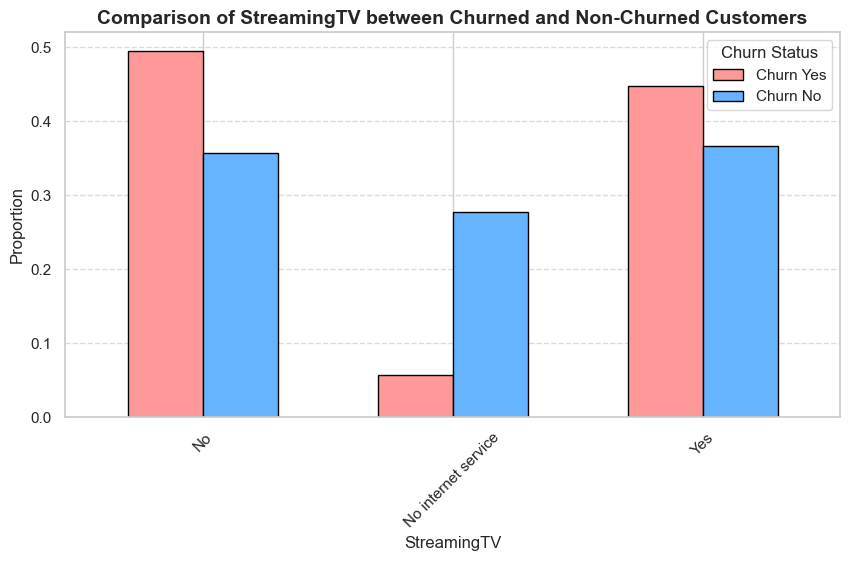

<Figure size 1000x500 with 0 Axes>

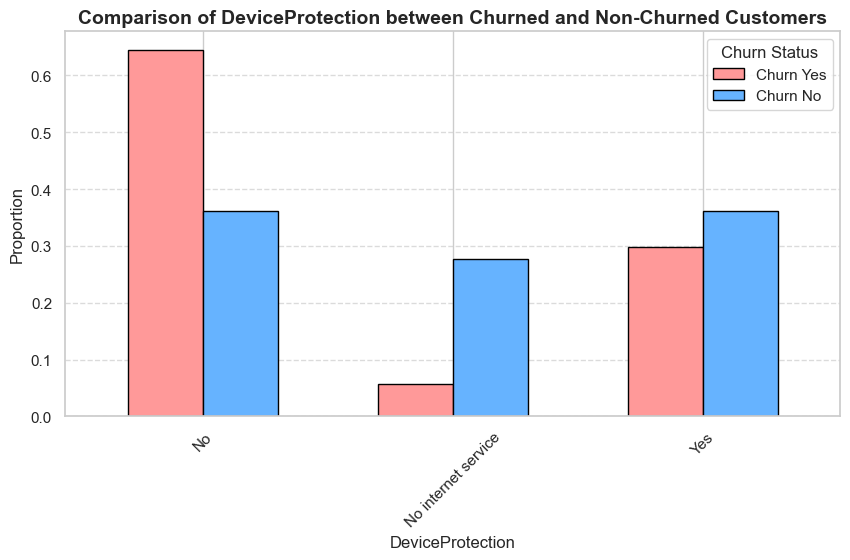

<Figure size 1000x500 with 0 Axes>

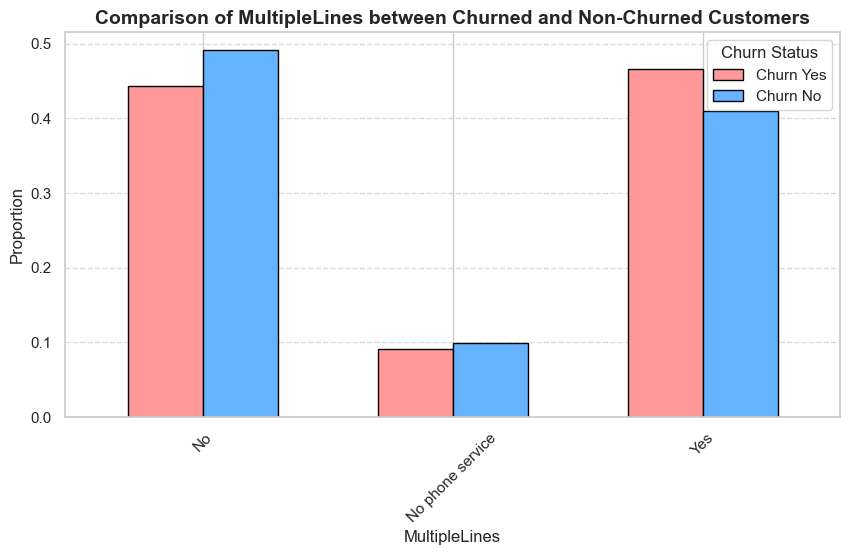

<Figure size 1000x500 with 0 Axes>

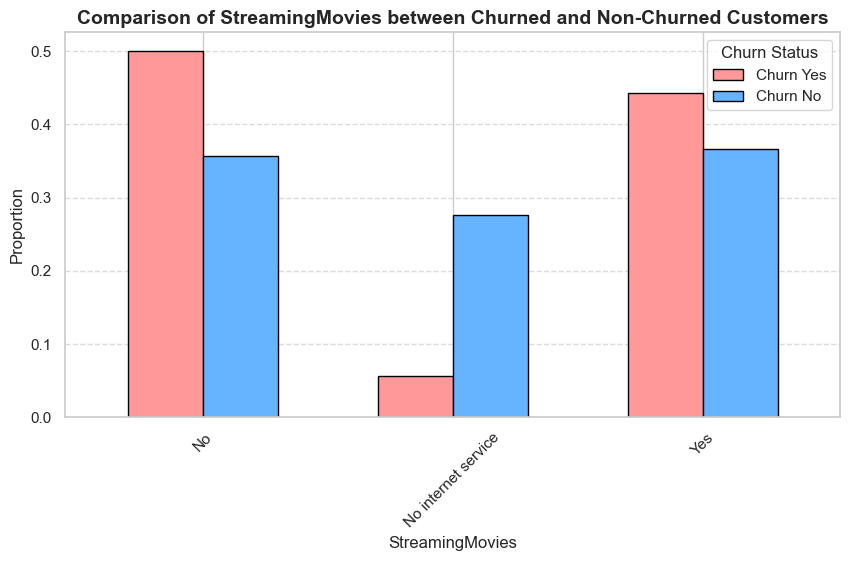

<Figure size 1000x500 with 0 Axes>

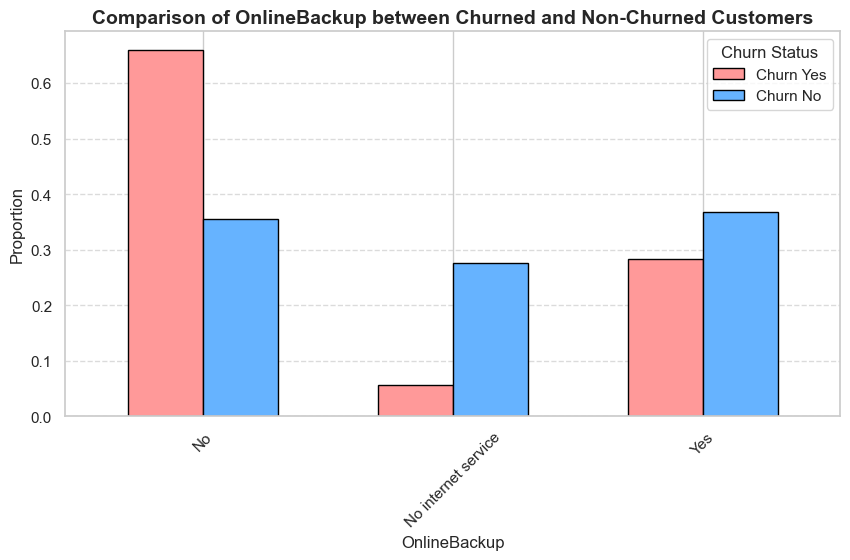

<Figure size 1000x500 with 0 Axes>

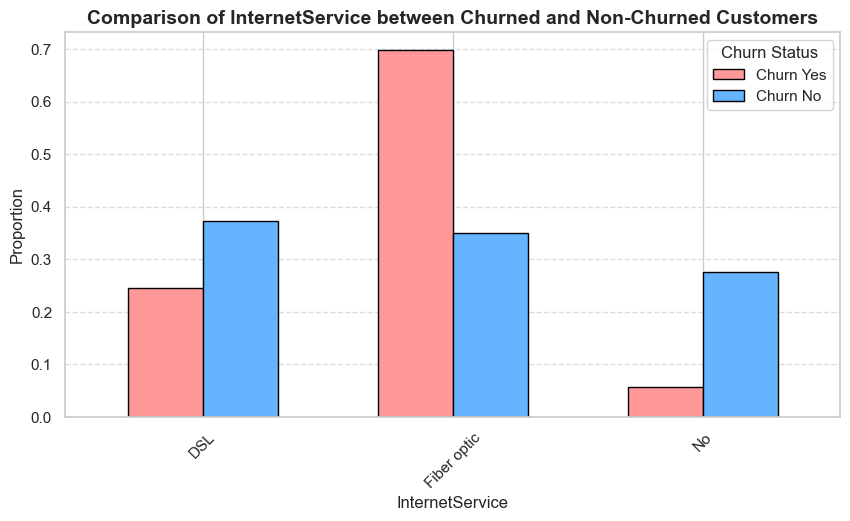

<Figure size 1000x500 with 0 Axes>

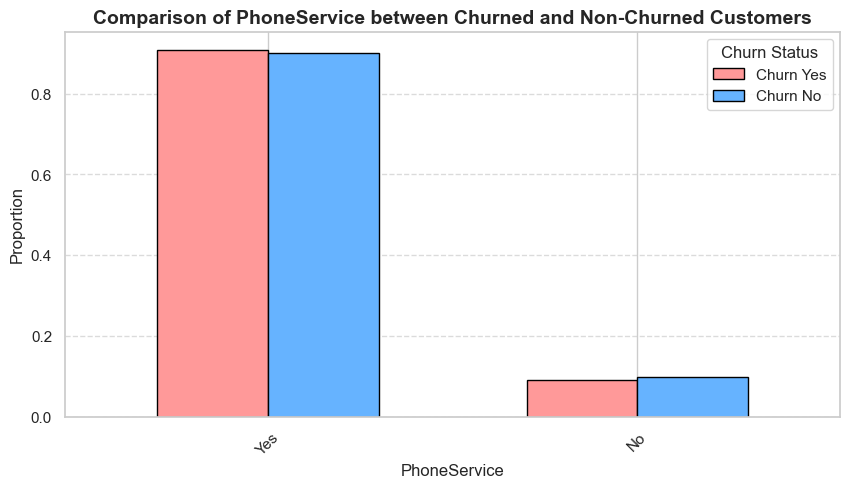

<Figure size 1000x500 with 0 Axes>

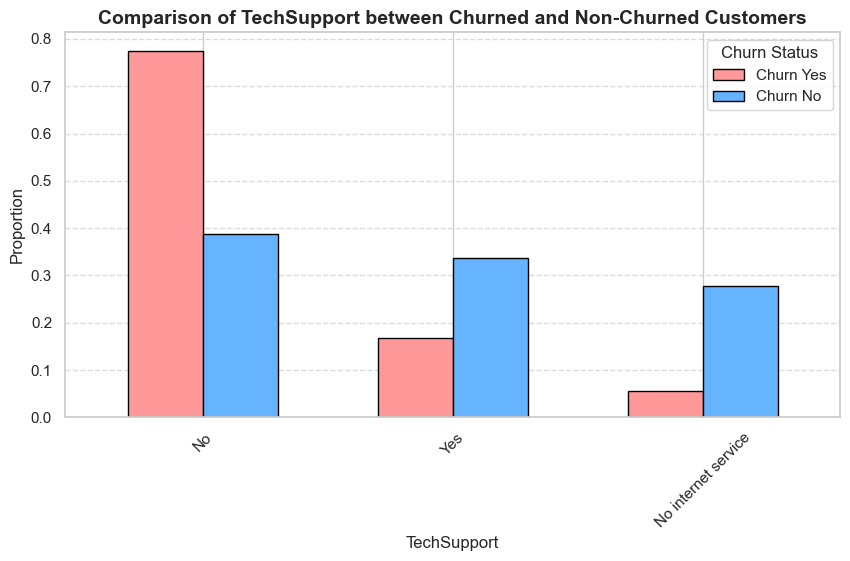

<Figure size 1000x500 with 0 Axes>

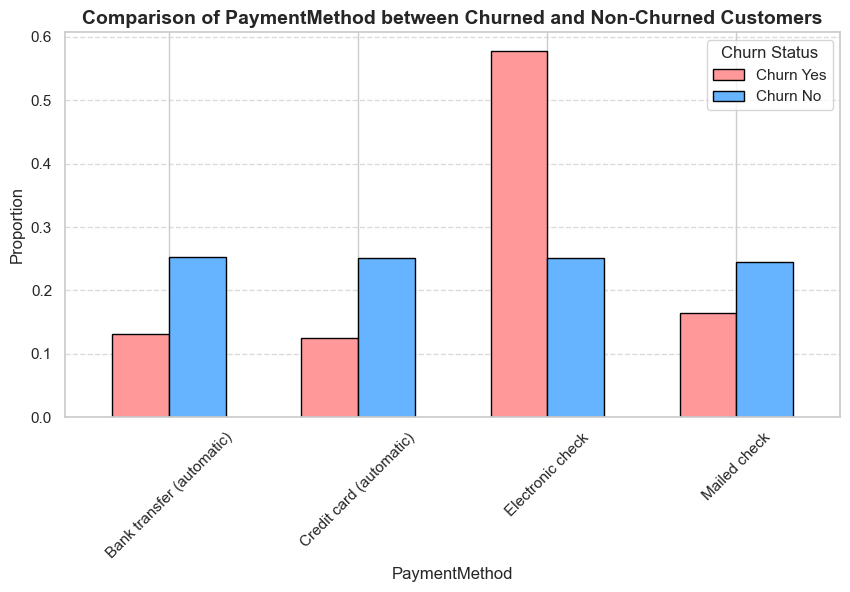

<Figure size 1000x500 with 0 Axes>

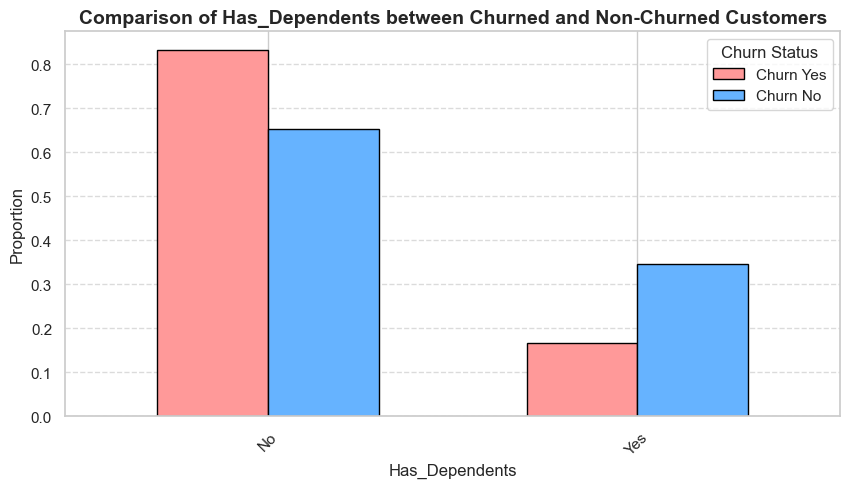

<Figure size 1000x500 with 0 Axes>

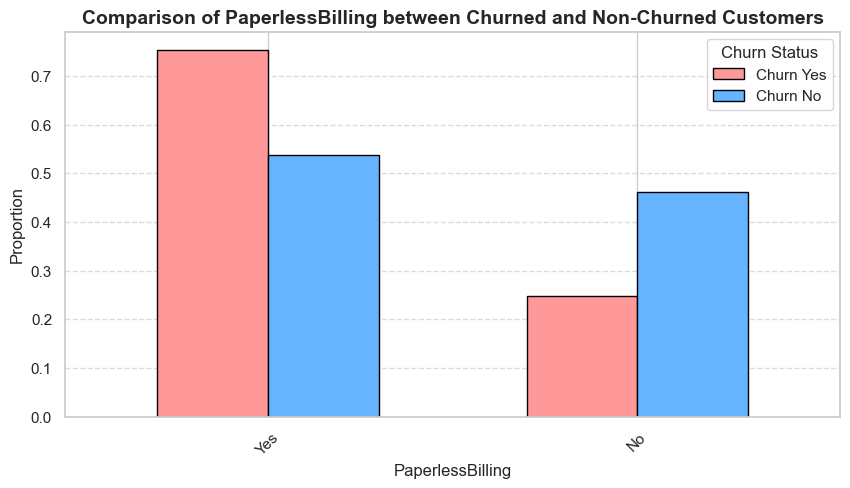

<Figure size 1000x500 with 0 Axes>

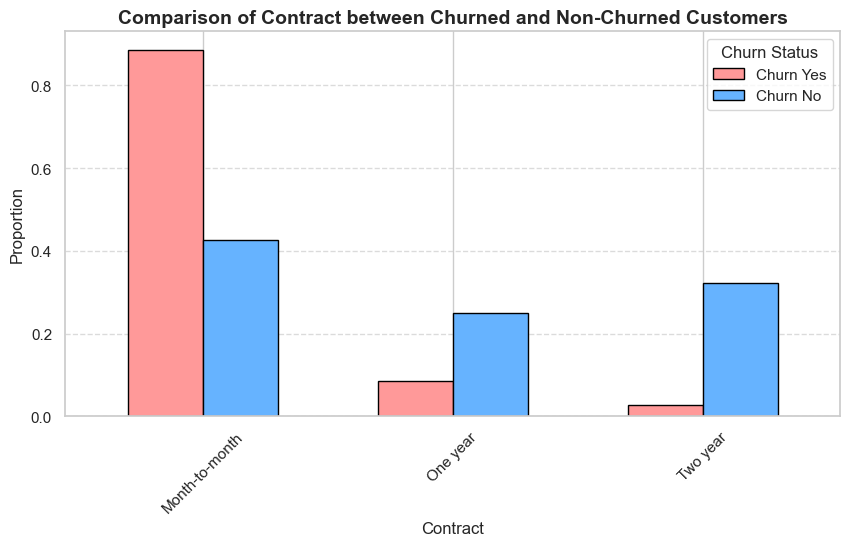

<Figure size 1000x500 with 0 Axes>

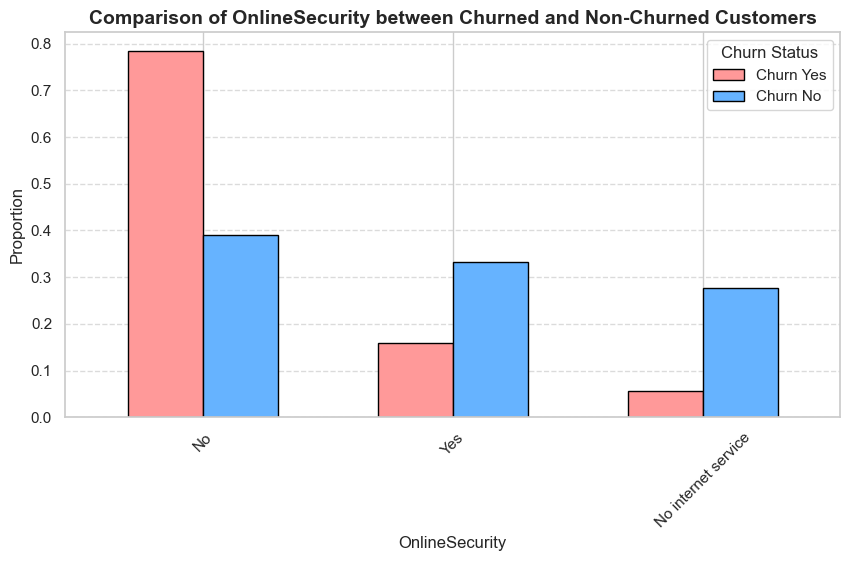

<Figure size 1000x500 with 0 Axes>

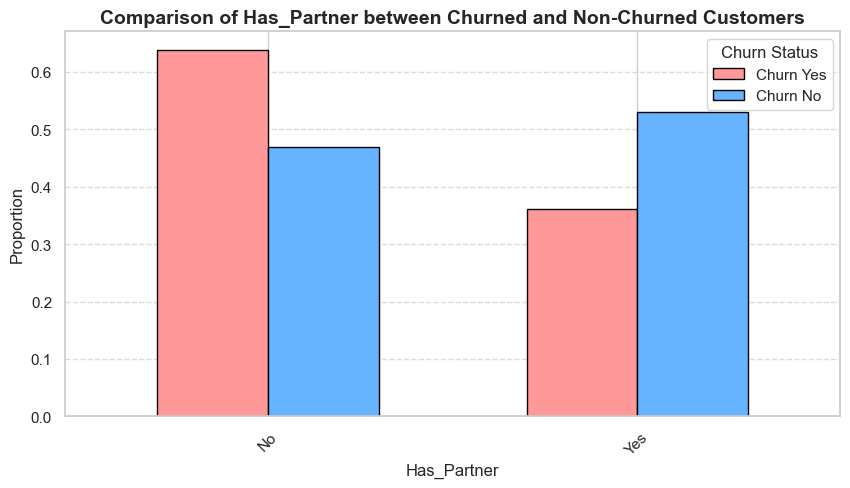

<Figure size 1000x500 with 0 Axes>

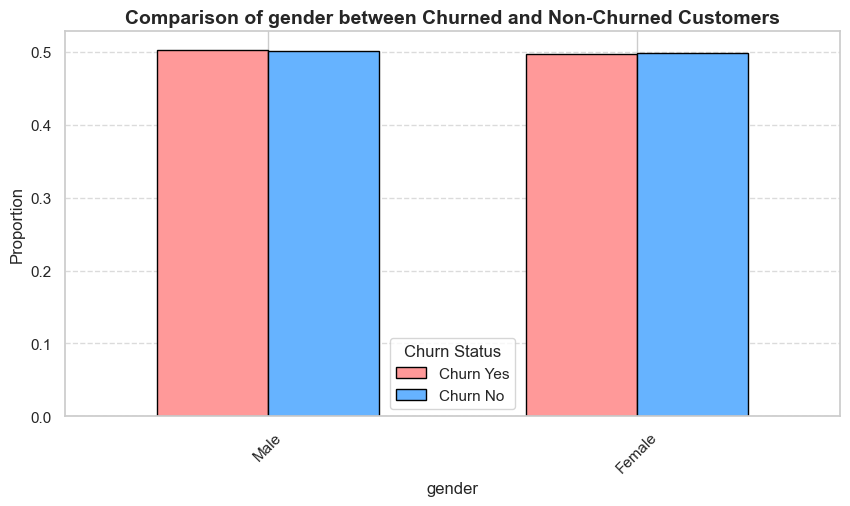

Column 'gender' is missing in one or both DataFrames. Skipping plot.


In [513]:
sns.set_theme(style="whitegrid")

all_categorical_columns = set(telcchurn.select_dtypes(include=['object']).columns) | set(telcNOchurn.select_dtypes(include=['object']).columns)
columns_to_exclude = {'Churn', 'customerID'}
columns_to_plot = all_categorical_columns - columns_to_exclude


for col in columns_to_plot:
    plt.figure(figsize=(10, 5))
    
    churn_yes_counts = telcchurn[col].value_counts(normalize=True) if col in telcchurn.columns else None
    churn_no_counts = telcNOchurn[col].value_counts(normalize=True) if col in telcNOchurn.columns else None

    df_compare = pd.DataFrame({'Churn Yes': churn_yes_counts, 'Churn No': churn_no_counts})
    df_compare.plot(kind='bar', width=0.6, figsize=(10, 5), color=['#FF9999', '#66B3FF'], edgecolor='black')

    plt.title(f"Comparison of {col} between Churned and Non-Churned Customers", fontsize=14, fontweight='bold')
    plt.xlabel(col, fontsize=12)
    plt.ylabel("Proportion", fontsize=12)
    plt.xticks(rotation=45, fontsize=11)  # Rotate x-axis labels for readability
    plt.legend(title="Churn Status", fontsize=11)
    plt.grid(axis='y', linestyle='--', alpha=0.7)  # Light dashed grid for better readability
    plt.show()
else:
    if col in columns_to_exclude: # Check if the column being skipped was in the excluded set
        print(f"Skipping plot for '{col}': This is the target variable or a unique identifier.")
    else:
        print(f"Column '{col}' is missing in one or both DataFrames. Skipping plot.")


## CORRELATION ANALYSIS OF ATTRIBUTES


INITIAL INSIGHTS FROM THE EXPLORATORY DATA ANALYSIS
1. **GENDERS** No such influence based on 
2. **Has_Partner** If individual does not Have any partner (NO) -> More likely to have Customer churn
3. **Has_Dependents** If Individual does not have any dependents (NO) -> More likely to have Customer Churn
4. **Phone_Service** No such influnece on Churn
5. **Multiple Lines** No such inflence
6. **Internet Service** With Fibre Optic more likely to Churn 
7. **Online Security** individual more likely to churn if NO online Security 
8. **Online Backup** individual more likely to churn if NO online Backup
9. **Device Protection** individual more likely to churn if NO Device Protection 
10. **Tech Support** individual more likely to churn if NO Tech Support
11. **Streaming TV** No such conclusive Influence
12. **Streaming Movies** No such conclusive Influence
13. **Contracts** Month-to-Month contract individuals more Likely to Churn
14. **Payment Method** Individuals with Electronic Payment are Highly Likely to Churn
    

### Correlation Analysis on the Churn Dataset

In [514]:
#as discussed above paperless billing plays no important part in customer churn
#customerID - being a unique identifier plays no significance to understanding churn 
telcchurn1 = telcchurn.drop(columns=['PaperlessBilling','customerID'])

In [515]:
telcchurn1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1308 entries, 4499 to 272
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            1308 non-null   object 
 1   SeniorCitizen     1308 non-null   int64  
 2   Has_Partner       1308 non-null   object 
 3   Has_Dependents    1308 non-null   object 
 4   account_tenure    1308 non-null   int64  
 5   PhoneService      1308 non-null   object 
 6   MultipleLines     1308 non-null   object 
 7   InternetService   1308 non-null   object 
 8   OnlineSecurity    1308 non-null   object 
 9   OnlineBackup      1308 non-null   object 
 10  DeviceProtection  1308 non-null   object 
 11  TechSupport       1308 non-null   object 
 12  StreamingTV       1308 non-null   object 
 13  StreamingMovies   1308 non-null   object 
 14  Contract          1308 non-null   object 
 15  PaymentMethod     1308 non-null   object 
 16  MonthlyCharges    1308 non-null   float64
 17

In [516]:
#scaling values in MonthlyCharges and TotalCharges as range is different 
scaler = StandardScaler()
telcchurn1[['MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(telcchurn1[['MonthlyCharges', 'TotalCharges']])


In [517]:
# Find object-type columns
categorical_cols = telcchurn1.select_dtypes(include=['object']).columns.tolist()

# Print unique values for each categorical column
for col in categorical_cols:
    print(f"Column: {col}\nUnique Values: {telcchurn1[col].unique()[:10]}\n")  # Show first 10 unique values


Column: gender
Unique Values: ['Female' 'Male']

Column: Has_Partner
Unique Values: ['No' 'Yes']

Column: Has_Dependents
Unique Values: ['Yes' 'No']

Column: PhoneService
Unique Values: ['Yes' 'No']

Column: MultipleLines
Unique Values: ['Yes' 'No' 'No phone service']

Column: InternetService
Unique Values: ['Fiber optic' 'DSL' 'No']

Column: OnlineSecurity
Unique Values: ['Yes' 'No' 'No internet service']

Column: OnlineBackup
Unique Values: ['No' 'No internet service' 'Yes']

Column: DeviceProtection
Unique Values: ['No' 'Yes' 'No internet service']

Column: TechSupport
Unique Values: ['No' 'Yes' 'No internet service']

Column: StreamingTV
Unique Values: ['No' 'Yes' 'No internet service']

Column: StreamingMovies
Unique Values: ['No' 'Yes' 'No internet service']

Column: Contract
Unique Values: ['Month-to-month' 'Two year' 'One year']

Column: PaymentMethod
Unique Values: ['Electronic check' 'Bank transfer (automatic)' 'Credit card (automatic)'
 'Mailed check']

Column: Churn
Unique 

In [518]:
telcchurn1 = pd.get_dummies(telcchurn1, drop_first=True, dtype=int)
telcchurn1

,SeniorCitizen,account_tenure,MonthlyCharges,TotalCharges,gender_Male,Has_Partner_Yes,Has_Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
4499,0,12,0.138340,-0.336154,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,1,0
3610,0,12,1.023330,-0.204691,0,0,0,1,0,1,...,0,0,1,0,1,0,0,0,0,0
697,0,3,-1.001818,-0.718146,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
6785,0,61,1.487089,2.739367,1,0,0,1,0,1,...,1,0,1,0,1,0,1,1,0,0
4719,0,36,0.405660,0.776138,1,0,0,1,0,1,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2873,0,25,0.802589,0.412702,1,0,0,1,0,1,...,0,0,1,0,1,0,0,0,0,0
3888,0,1,0.213271,-0.763504,0,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
4428,0,19,1.150915,0.232607,1,1,1,1,0,1,...,1,0,1,0,1,0,0,0,1,0
2948,1,41,1.009154,1.390592,1,1,0,1,0,1,...,0,0,1,0,1,0,0,0,1,0


In [519]:
telcchurn1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1308 entries, 4499 to 272
Data columns (total 29 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          1308 non-null   int64  
 1   account_tenure                         1308 non-null   int64  
 2   MonthlyCharges                         1308 non-null   float64
 3   TotalCharges                           1308 non-null   float64
 4   gender_Male                            1308 non-null   int32  
 5   Has_Partner_Yes                        1308 non-null   int32  
 6   Has_Dependents_Yes                     1308 non-null   int32  
 7   PhoneService_Yes                       1308 non-null   int32  
 8   MultipleLines_No phone service         1308 non-null   int32  
 9   MultipleLines_Yes                      1308 non-null   int32  
 10  InternetService_Fiber optic            1308 non-null   int32  
 11  Interne

In [520]:
correlation_matrix = telcchurn1.corr()

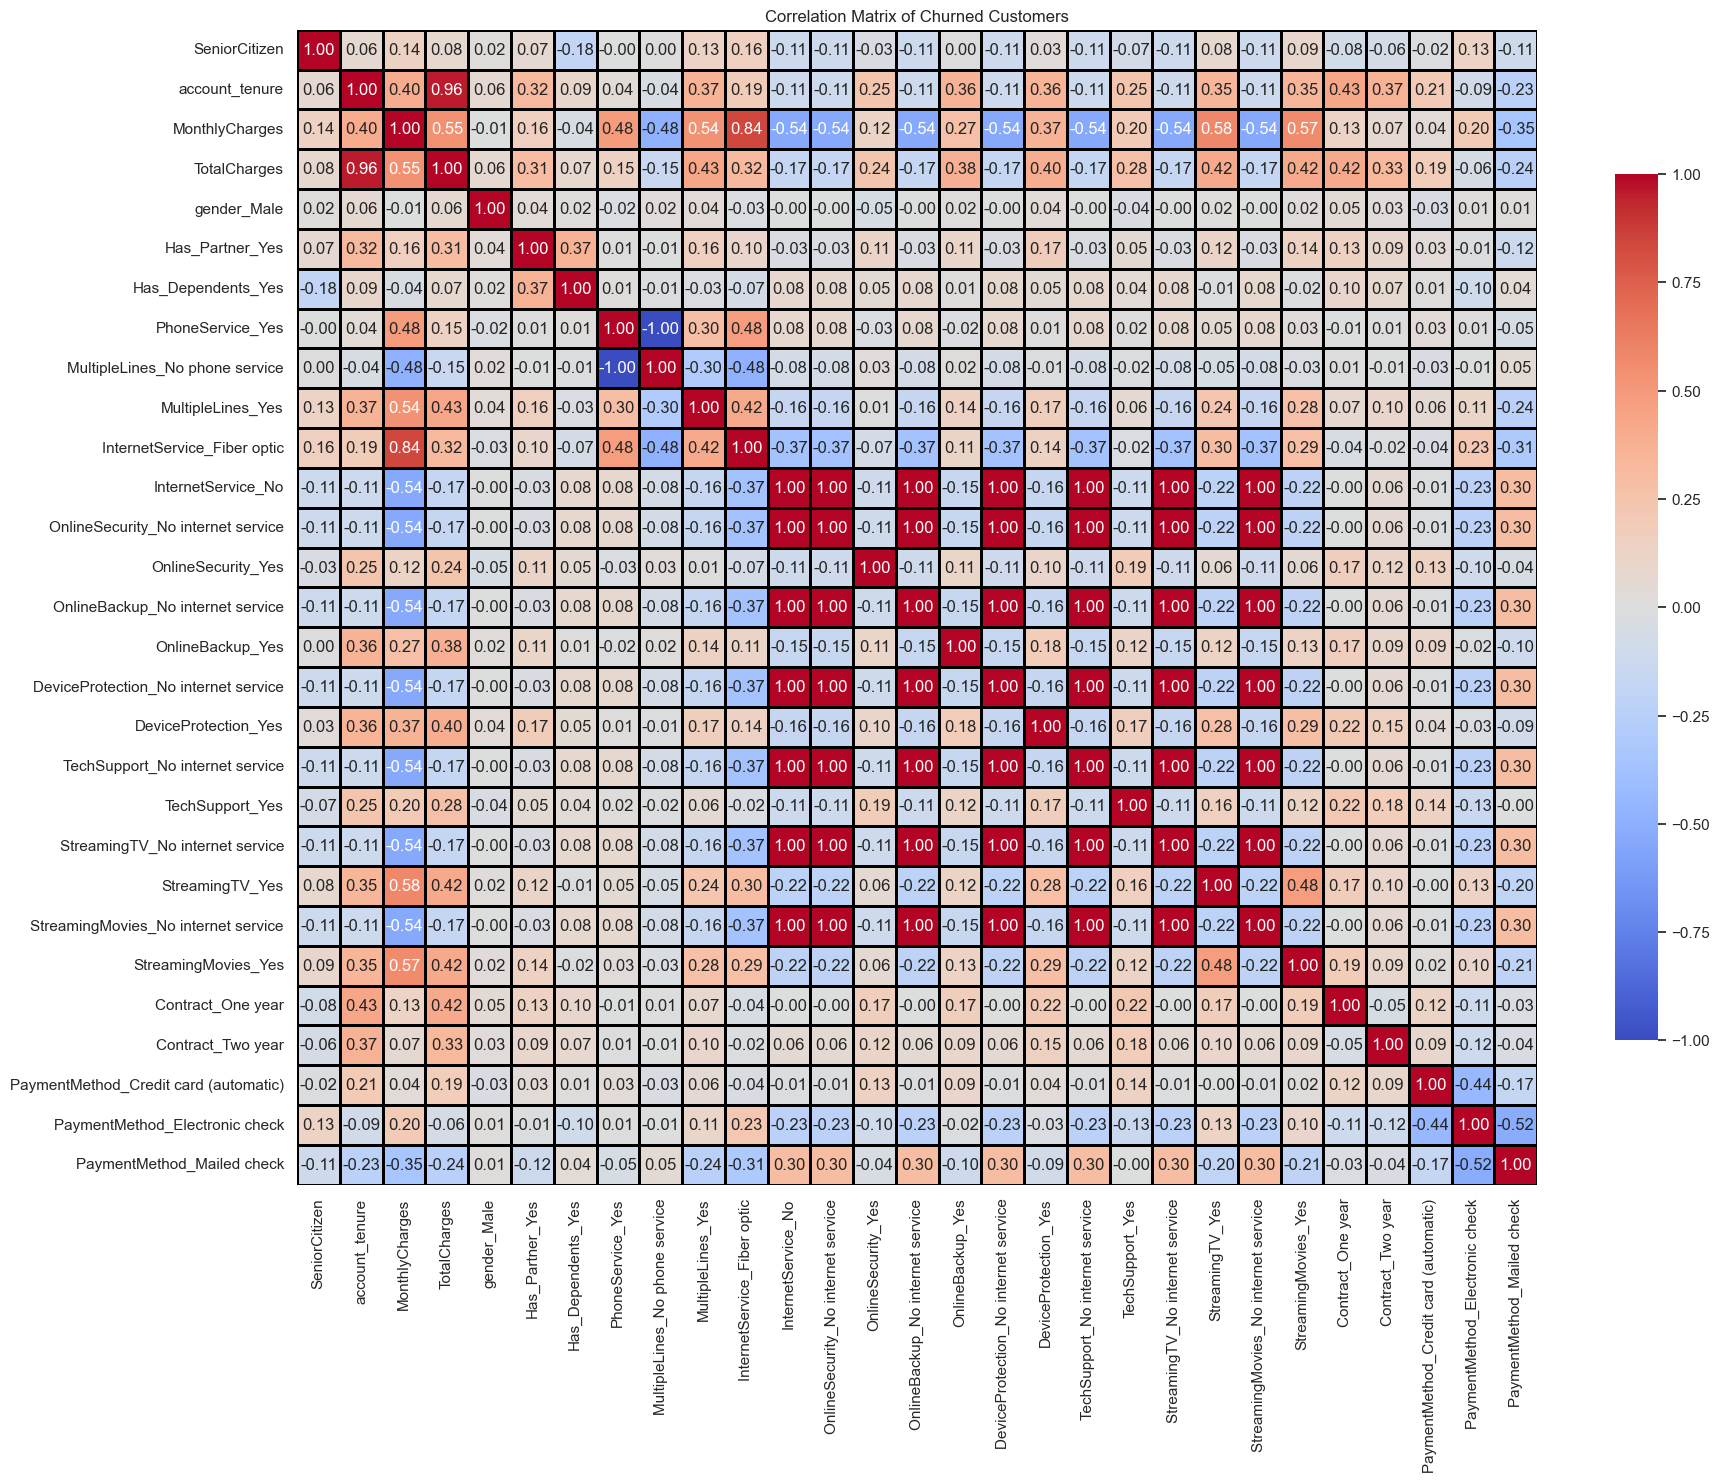

In [521]:
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=1, linecolor='black', cbar_kws={'shrink': 0.75})
plt.title("Correlation Matrix of Churned Customers")
plt.show()

In [522]:
# Step 1: Mask the diagonal (set to NaN so they are not considered in the pairs)
np.fill_diagonal(correlation_matrix.values, np.nan)

# Step 2: Find pairs with correlation > 0.9
high_corr_pairs = []

# Loop through the correlation matrix to find pairs above 0.9
for col in correlation_matrix.columns:
    for row in correlation_matrix.index:
        # Avoid duplicates and check if correlation > 0.9
        if abs(correlation_matrix.loc[row, col]) > 0.9 and row != col:
            high_corr_pairs.append((row, col, correlation_matrix.loc[row, col]))

# Print the pairs with high correlation
print("Highly Correlated Pairs (Correlation > 0.9):")
for pair in high_corr_pairs:
    print(f"{pair[0]} - {pair[1]}: {pair[2]:.2f}")


Highly Correlated Pairs (Correlation > 0.9):
TotalCharges - account_tenure: 0.96
account_tenure - TotalCharges: 0.96
MultipleLines_No phone service - PhoneService_Yes: -1.00
PhoneService_Yes - MultipleLines_No phone service: -1.00
OnlineSecurity_No internet service - InternetService_No: 1.00
OnlineBackup_No internet service - InternetService_No: 1.00
DeviceProtection_No internet service - InternetService_No: 1.00
TechSupport_No internet service - InternetService_No: 1.00
StreamingTV_No internet service - InternetService_No: 1.00
StreamingMovies_No internet service - InternetService_No: 1.00
InternetService_No - OnlineSecurity_No internet service: 1.00
OnlineBackup_No internet service - OnlineSecurity_No internet service: 1.00
DeviceProtection_No internet service - OnlineSecurity_No internet service: 1.00
TechSupport_No internet service - OnlineSecurity_No internet service: 1.00
StreamingTV_No internet service - OnlineSecurity_No internet service: 1.00
StreamingMovies_No internet servic

In [523]:
# Assuming high_corr_pairs list is already populated with the high correlation pairs
# Step 1: Flatten the list of attribute names
attribute_list = [attr for pair in high_corr_pairs for attr in pair[:2]]

# Step 2: Count the frequency of each attribute
attribute_counts = Counter(attribute_list)

# Step 3: Sort the attributes by frequency (in descending order)
sorted_attribute_counts = attribute_counts.most_common()

# Step 4: Print the sorted attributes and their counts
print("Attributes Recurring in Highly Correlated Pairs:")
for attribute, count in sorted_attribute_counts:
    print(f"{attribute}: {count}")


Attributes Recurring in Highly Correlated Pairs:
OnlineSecurity_No internet service: 12
InternetService_No: 12
OnlineBackup_No internet service: 12
DeviceProtection_No internet service: 12
TechSupport_No internet service: 12
StreamingTV_No internet service: 12
StreamingMovies_No internet service: 12
TotalCharges: 2
account_tenure: 2
MultipleLines_No phone service: 2
PhoneService_Yes: 2


## FEATURE ENGINEERING

In [524]:
# Create a new DataFrame (copy of the original)
train_telc1 = train_telc.copy()

In [525]:
#scaling values in MonthlyCharges and TotalCharges as range is different 
scaler = StandardScaler()
train_telc1[['MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(train_telc1[['MonthlyCharges', 'TotalCharges']])

In [526]:
# Copying CustomerID and saving it in a Dataframe
customer_id_df = train_telc1[['customerID']].copy()
customer_id_df

,customerID
4499,6178-KFNHS
1933,1964-SVLEA
4668,1791-PQHBB
5681,2522-WLNSF
3610,2612-RANWT
...,...
5161,0696-UKTOX
3451,5397-TUPSH
4135,8670-MEFCP
4249,7919-ZODZZ


CustomerID being unique could lead to overfitting or poor generalization while performing PCA/training the model.

### Dropping Columns/Attributes


1. The first decision will be a **judgement based decision(Heuristic decision)** for DIMENSIONALITY REDUCTION is to get rid of the **Paperless Billing** column - as it only serves as a medium to get the bill to the user. The user would already be aware of the ammount he is being charged - paperless billing just serves as a convenience for storing the bill. Highly unlikely to have any role in the CHURN.
2. Attribute **Gender** has no significance on either Churn or No Churn - Thus the column will be dropped.
3. Attribute **PhoneService** has no significance on either Churn or No Churn - Thus the column will be dropped.

In [527]:
train_telc1 = train_telc1.drop(columns=['PaperlessBilling','customerID','gender','PhoneService'])
train_telc1

,SeniorCitizen,Has_Partner,Has_Dependents,account_tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4499,0,No,Yes,12,Yes,Fiber optic,Yes,No,No,No,No,No,Month-to-month,Electronic check,0.444749,-0.607066,Yes
1933,0,No,No,20,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Mailed check,-1.492135,-0.823672,No
4668,0,No,Yes,2,No,DSL,Yes,No,No,No,No,Yes,Month-to-month,Credit card (automatic),-0.120451,-0.950975,No
5681,1,Yes,No,34,No,DSL,No,No,Yes,Yes,Yes,No,One year,Bank transfer (automatic),-0.021293,-0.081500,No
3610,0,No,No,12,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Bank transfer (automatic),1.166949,-0.495086,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5161,0,No,Yes,23,No,DSL,No,Yes,No,Yes,No,No,Month-to-month,Electronic check,-0.353472,-0.430041,No
3451,1,Yes,No,65,No,Fiber optic,No,No,No,No,No,No,One year,Bank transfer (automatic),0.201812,0.993692,No
4135,0,Yes,Yes,36,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Credit card (automatic),0.927318,0.477390,No
4249,0,Yes,Yes,10,No,DSL,No,Yes,Yes,No,No,Yes,One year,Mailed check,0.034897,-0.716478,No


### Label Encoding

Applying **Label Encoding** on the PaymentMethod column by giving priority to the safest method of payment ( assign it the highest number) and least safe method (lowest number)
In the case of PaymentMethod (we will take into consideratio safety+popularity) - we will rank from most safe (4) to least safe(1)

- Credit Card (4)
- Bank Transfer (3)
- Electronic Check (2)
- Mailed Check (1)

In [528]:
#using manual mapping for the above
payment_mapping = {
    'Electronic check': 4,
    'Credit card (automatic)': 3,
    'Bank transfer (automatic)': 2,
    'Mailed check': 1
}

train_telc1['PaymentMethod'] = train_telc1['PaymentMethod'].map(payment_mapping)
train_telc1

,SeniorCitizen,Has_Partner,Has_Dependents,account_tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4499,0,No,Yes,12,Yes,Fiber optic,Yes,No,No,No,No,No,Month-to-month,4,0.444749,-0.607066,Yes
1933,0,No,No,20,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,1,-1.492135,-0.823672,No
4668,0,No,Yes,2,No,DSL,Yes,No,No,No,No,Yes,Month-to-month,3,-0.120451,-0.950975,No
5681,1,Yes,No,34,No,DSL,No,No,Yes,Yes,Yes,No,One year,2,-0.021293,-0.081500,No
3610,0,No,No,12,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,2,1.166949,-0.495086,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5161,0,No,Yes,23,No,DSL,No,Yes,No,Yes,No,No,Month-to-month,4,-0.353472,-0.430041,No
3451,1,Yes,No,65,No,Fiber optic,No,No,No,No,No,No,One year,2,0.201812,0.993692,No
4135,0,Yes,Yes,36,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,3,0.927318,0.477390,No
4249,0,Yes,Yes,10,No,DSL,No,Yes,Yes,No,No,Yes,One year,1,0.034897,-0.716478,No


### Adding New Attributes

1. The 2 columns/attributes **Has_dependents** and **Has_Partners** are very similar in nature and can be converged into one single column **HasPartnerOrDependents**
2. Adding a column labelled **NewUser** for customers who have joined in the past 6 months
3. Adding a column labelled **LongTermUser** for customers who have been with the company for more than 24 months
4. Adding a column labelled **Midterm User** for customers who have been between 6 to 24 months with the company
5. Adding a column labelled **numberOfServices** which keeps track of how many services in total a customer has out of the following: InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV and StreamingMovies.

In [529]:
service_columns = ['InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Add the new columns to the new DataFrame
train_telc1['numberofservices'] = train_telc1[service_columns].apply(lambda x: (x == 'Yes').sum(), axis=1)
train_telc1['HasPartnerOrDependents'] = ((train_telc1['Has_Partner'] == 'Yes') | (train_telc1['Has_Dependents'] == 'Yes')).astype(int)
train_telc1['NewUser'] = (train_telc1['account_tenure'] <= 6).astype(int)
train_telc1['LongTermUser'] = (train_telc1['account_tenure'] > 24).astype(int)
train_telc1['MidTermUser'] = ((train_telc1['account_tenure'] > 7) & (train_telc1['account_tenure'] < 24)).astype(int)
# Check the new DataFrame
print(train_telc1[['numberofservices', 'HasPartnerOrDependents', 'NewUser', 'LongTermUser','MidTermUser']].head())


      numberofservices  HasPartnerOrDependents  NewUser  LongTermUser  \
4499                 1                       1        0             0   
1933                 0                       0        0             0   
4668                 2                       1        1             0   
5681                 3                       1        0             1   
3610                 3                       0        0             0   

      MidTermUser  
4499            1  
1933            1  
4668            0  
5681            0  
3610            1  


In [530]:
train_telc1 = train_telc1.drop(columns=['Has_Partner','Has_Dependents'])


In [531]:
train_telc1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4922 entries, 4499 to 272
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   SeniorCitizen           4922 non-null   int64  
 1   account_tenure          4922 non-null   int64  
 2   MultipleLines           4922 non-null   object 
 3   InternetService         4922 non-null   object 
 4   OnlineSecurity          4922 non-null   object 
 5   OnlineBackup            4922 non-null   object 
 6   DeviceProtection        4922 non-null   object 
 7   TechSupport             4922 non-null   object 
 8   StreamingTV             4922 non-null   object 
 9   StreamingMovies         4922 non-null   object 
 10  Contract                4922 non-null   object 
 11  PaymentMethod           4922 non-null   int64  
 12  MonthlyCharges          4922 non-null   float64
 13  TotalCharges            4922 non-null   float64
 14  Churn                   4922 non-null   obj

### One-Hot Encoding

In [532]:
train_telc1 = pd.get_dummies(train_telc1, drop_first=True, dtype=int)
train_telc1

,SeniorCitizen,account_tenure,PaymentMethod,MonthlyCharges,TotalCharges,numberofservices,HasPartnerOrDependents,NewUser,LongTermUser,MidTermUser,...,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,Churn_Yes
4499,0,12,4,0.444749,-0.607066,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1933,0,20,1,-1.492135,-0.823672,0,0,0,0,1,...,0,1,0,1,0,1,0,1,0,0
4668,0,2,3,-0.120451,-0.950975,2,1,1,0,0,...,0,0,0,0,0,0,1,0,0,0
5681,1,34,2,-0.021293,-0.081500,3,1,0,1,0,...,1,0,1,0,1,0,0,1,0,0
3610,0,12,2,1.166949,-0.495086,3,0,0,0,1,...,1,0,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5161,0,23,4,-0.353472,-0.430041,2,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0
3451,1,65,2,0.201812,0.993692,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4135,0,36,3,0.927318,0.477390,6,1,0,1,0,...,1,0,1,0,1,0,1,0,1,0
4249,0,10,1,0.034897,-0.716478,3,1,0,0,1,...,1,0,0,0,0,0,1,1,0,0


In [533]:
train_telc1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4922 entries, 4499 to 272
Data columns (total 29 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeniorCitizen                         4922 non-null   int64  
 1   account_tenure                        4922 non-null   int64  
 2   PaymentMethod                         4922 non-null   int64  
 3   MonthlyCharges                        4922 non-null   float64
 4   TotalCharges                          4922 non-null   float64
 5   numberofservices                      4922 non-null   int64  
 6   HasPartnerOrDependents                4922 non-null   int32  
 7   NewUser                               4922 non-null   int32  
 8   LongTermUser                          4922 non-null   int32  
 9   MidTermUser                           4922 non-null   int32  
 10  MultipleLines_No phone service        4922 non-null   int32  
 11  MultipleLines_Yes   

In [534]:
#Copying Churn_Yes and saving it in a Dataframe
TARGET = train_telc1[['Churn_Yes']].copy()
TARGET

,Churn_Yes
4499,1
1933,0
4668,0
5681,0
3610,1
...,...
5161,0
3451,0
4135,0
4249,0


In [535]:
train_telc1 = train_telc1.drop('Churn_Yes',axis = 1)
train_telc1

,SeniorCitizen,account_tenure,PaymentMethod,MonthlyCharges,TotalCharges,numberofservices,HasPartnerOrDependents,NewUser,LongTermUser,MidTermUser,...,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year
4499,0,12,4,0.444749,-0.607066,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1933,0,20,1,-1.492135,-0.823672,0,0,0,0,1,...,1,0,1,0,1,0,1,0,1,0
4668,0,2,3,-0.120451,-0.950975,2,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
5681,1,34,2,-0.021293,-0.081500,3,1,0,1,0,...,0,1,0,1,0,1,0,0,1,0
3610,0,12,2,1.166949,-0.495086,3,0,0,0,1,...,0,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5161,0,23,4,-0.353472,-0.430041,2,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0
3451,1,65,2,0.201812,0.993692,0,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4135,0,36,3,0.927318,0.477390,6,1,0,1,0,...,0,1,0,1,0,1,0,1,0,1
4249,0,10,1,0.034897,-0.716478,3,1,0,0,1,...,0,1,0,0,0,0,0,1,1,0


## Principal Component Analysis

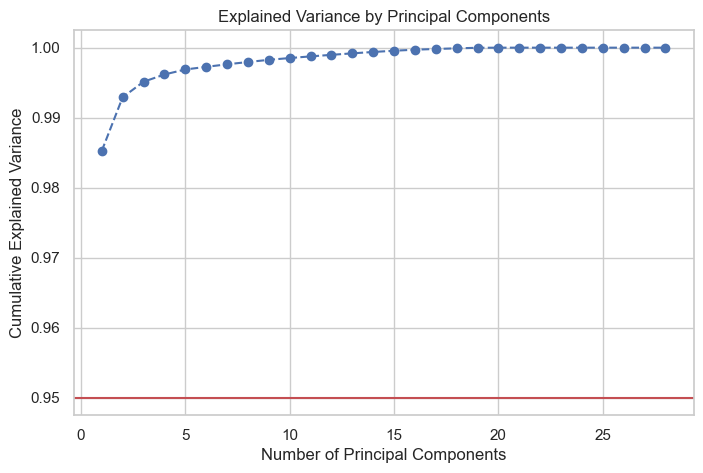

In [536]:
# Applying PCA
pca = PCA()
pca.fit(train_telc1)

# Explained variance ratio
explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Plot cumulative explained variance to find the threshold
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.axhline(y=0.95, color='r', linestyle='-')  # 95% threshold
plt.show()


Implementing a For Loop to traverse against top number of features in PCA and see which number of features would suit better.

In [537]:
# Get feature importance from PCA
feature_importance = pd.DataFrame(pca.components_, columns=train_telc1.columns)
top_features = feature_importance.abs().mean().sort_values(ascending=False)

# Feature set sizes to test
feature_set_sizes = [30, 20, 15, 10, 7]

# Dictionary to store results
results = {}

for i, num_features in enumerate(feature_set_sizes):
    # Select top features
    top_n_features = top_features.head(num_features).index.tolist()
    pcav = train_telc1[top_n_features]

    # Train-Test Split
    X_train, X_test, y_train, y_test = train_test_split(pcav, TARGET, test_size=0.2, random_state=42, stratify=TARGET)

    # Train Random Forest
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)
    rf_pred = rf.predict(X_test)
    rf_acc = accuracy_score(y_test, rf_pred)

    # Train XGBoost
    xgb = XGBClassifier(n_estimators=100, random_state=42, use_label_encoder=False, eval_metric='logloss')
    xgb.fit(X_train, y_train)
    xgb_pred = xgb.predict(X_test)
    xgb_acc = accuracy_score(y_test, xgb_pred)

    # Store results
    results[f'Top {num_features} Features'] = {'Random Forest': rf_acc, 'XGBoost': xgb_acc}

# Display results
results_pca = pd.DataFrame(results).T
print(results_pca)

c:\Users\Utkarsh Singh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

c:\Users\Utkarsh Singh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

c:\Users\Utkarsh Singh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

c:\Users\Utkarsh Singh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n

                 Random Forest   XGBoost
Top 30 Features       0.794924  0.782741
Top 20 Features       0.781726  0.794924
Top 15 Features       0.770558  0.800000
Top 10 Features       0.736041  0.790863
Top 7 Features        0.744162  0.790863


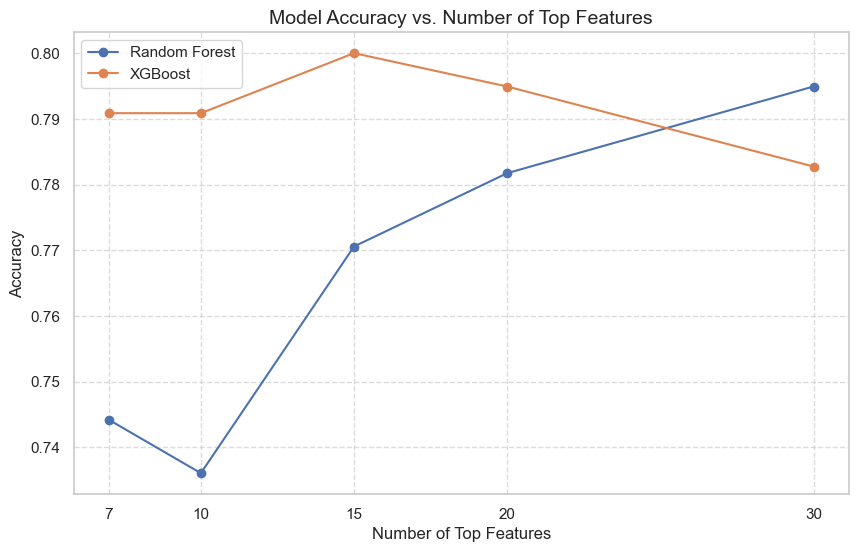

In [538]:
plt.figure(figsize=(10, 6)) 

plt.plot(feature_set_sizes, results_pca['Random Forest'], marker='o', label='Random Forest')
plt.plot(feature_set_sizes, results_pca['XGBoost'], marker='o', label='XGBoost')

plt.xlabel('Number of Top Features', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Model Accuracy vs. Number of Top Features', fontsize=14)
plt.xticks(feature_set_sizes)  # Set x-axis ticks to feature set sizes
plt.legend(fontsize=11)
plt.grid(True, linestyle='--', alpha=0.7)  # Add a grid for better readability
plt.show()


## RANDOM FOREST FEATURE IMPORANCE RANKING 

c:\Users\Utkarsh Singh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

c:\Users\Utkarsh Singh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

c:\Users\Utkarsh Singh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

c:\Users\Utkarsh Singh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n

   Num_Features  RF_Accuracy  XGB_Accuracy
0            30     0.801015      0.782741
1            20     0.794924      0.791878
2            15     0.789848      0.783756
3            10     0.773604      0.798985
4             7     0.776650      0.782741


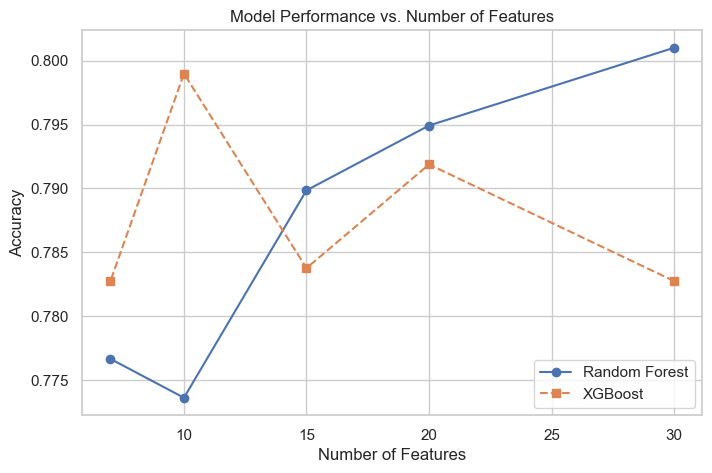

In [539]:
# Step 1: Train Random Forest on full dataset to get feature importance
rf_full = RandomForestClassifier(n_estimators=100, random_state=42)
rf_full.fit(train_telc1, TARGET)

# Extract feature importances
feature_importance = pd.DataFrame({'Feature': train_telc1.columns, 'Importance': rf_full.feature_importances_})
feature_importance = feature_importance.sort_values(by="Importance", ascending=False)

# Defining feature selection thresholds
top_n_list = [30, 20, 15, 10, 7]  

# List to store accuracy results
resultsRF = []

for num_features in top_n_list:
    # Select top N features
    top_features = feature_importance.head(num_features)['Feature'].tolist()
    train_subset = train_telc1[top_features]

    # Train-Test Split (80:20)
    X_train, X_test, y_train, y_test = train_test_split(train_subset, TARGET, test_size=0.2, random_state=42, stratify=TARGET)

    # Train Random Forest
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)
    rf_pred = rf.predict(X_test)
    rf_acc = accuracy_score(y_test, rf_pred)

    # Train XGBoost
    xgb = XGBClassifier(n_estimators=100, random_state=42, use_label_encoder=False, eval_metric='logloss')
    xgb.fit(X_train, y_train)
    xgb_pred = xgb.predict(X_test)
    xgb_acc = accuracy_score(y_test, xgb_pred)

    # Append results to the correctly named list
    resultsRF.append([num_features, rf_acc, xgb_acc])

# Convert results to DataFrame and display
results_rf = pd.DataFrame(resultsRF, columns=['Num_Features', 'RF_Accuracy', 'XGB_Accuracy'])
print(results_rf)

# Plot accuracy for different feature set sizes
plt.figure(figsize=(8,5))
plt.plot(results_rf['Num_Features'], results_rf['RF_Accuracy'], marker='o', linestyle='-', label='Random Forest')
plt.plot(results_rf['Num_Features'], results_rf['XGB_Accuracy'], marker='s', linestyle='--', label='XGBoost')
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.title('Model Performance vs. Number of Features')
plt.legend()
plt.show()


### Hyperparamter Tuning - RandomForest


In [540]:
# Select top N features from Random Forest feature importance (example: top 20)
top_features = feature_importance.head(15)['Feature'].tolist()
X_train_sub = train_telc1[top_features]
X_train, X_test, y_train, y_test = train_test_split(X_train_sub, TARGET, test_size=0.2, random_state=42, stratify=TARGET)

# Define hyperparameters grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

# Initialize Random Forest model
rf = RandomForestClassifier(random_state=42)

# Set up GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit the model to the data
grid_search_rf.fit(X_train, y_train)

# Get the best parameters and best score
print("Best Parameters (Random Forest):", grid_search_rf.best_params_)
print("Best Accuracy (Random Forest):", grid_search_rf.best_score_)

# Evaluate the best model on the test set
best_rf = grid_search_rf.best_estimator_
rf_pred = best_rf.predict(X_test)
rf_acc_tuned = accuracy_score(y_test, rf_pred)
print(f"Tuned Random Forest Accuracy: {rf_acc_tuned:.4f}")


Fitting 5 folds for each of 648 candidates, totalling 3240 fits


c:\Users\Utkarsh Singh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning:


1080 fits failed out of a total of 3240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
391 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Utkarsh Singh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Utkarsh Singh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\Utkarsh Singh\AppData\Local\Programs\Python\Pytho

Best Parameters (Random Forest): {'bootstrap': True, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Best Accuracy (Random Forest): 0.7998535852269429
Tuned Random Forest Accuracy: 0.8142


## XGBOOST Feature Importance Ranking 

Feature Importance (XGBoost):
                         Feature  Importance
12  InternetService_Fiber optic    0.561912
13           InternetService_No    0.176494
27            Contract_Two year    0.085759
26            Contract_One year    0.037677
1                account_tenure    0.016278
25          StreamingMovies_Yes    0.014165
11            MultipleLines_Yes    0.011850
23              StreamingTV_Yes    0.009363
15           OnlineSecurity_Yes    0.008751
21              TechSupport_Yes    0.008076
Top 30 features (XGBoost): ['InternetService_Fiber optic', 'InternetService_No', 'Contract_Two year', 'Contract_One year', 'account_tenure', 'StreamingMovies_Yes', 'MultipleLines_Yes', 'StreamingTV_Yes', 'OnlineSecurity_Yes', 'TechSupport_Yes', 'MultipleLines_No phone service', 'SeniorCitizen', 'OnlineBackup_Yes', 'TotalCharges', 'PaymentMethod', 'numberofservices', 'DeviceProtection_Yes', 'MonthlyCharges', 'MidTermUser', 'HasPartnerOrDependents', 'LongTermUser', 'NewUser', 'Onlin

c:\Users\Utkarsh Singh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Num Features: 30, RF Accuracy: 0.7939086294416243, XGB Accuracy: 0.7847715736040609
Top 20 features (XGBoost): ['InternetService_Fiber optic', 'InternetService_No', 'Contract_Two year', 'Contract_One year', 'account_tenure', 'StreamingMovies_Yes', 'MultipleLines_Yes', 'StreamingTV_Yes', 'OnlineSecurity_Yes', 'TechSupport_Yes', 'MultipleLines_No phone service', 'SeniorCitizen', 'OnlineBackup_Yes', 'TotalCharges', 'PaymentMethod', 'numberofservices', 'DeviceProtection_Yes', 'MonthlyCharges', 'MidTermUser', 'HasPartnerOrDependents']
Shape of train_subset: (4922, 20)
Train size: (3937, 20), Test size: (985, 20)


c:\Users\Utkarsh Singh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Num Features: 20, RF Accuracy: 0.8, XGB Accuracy: 0.7847715736040609
Top 15 features (XGBoost): ['InternetService_Fiber optic', 'InternetService_No', 'Contract_Two year', 'Contract_One year', 'account_tenure', 'StreamingMovies_Yes', 'MultipleLines_Yes', 'StreamingTV_Yes', 'OnlineSecurity_Yes', 'TechSupport_Yes', 'MultipleLines_No phone service', 'SeniorCitizen', 'OnlineBackup_Yes', 'TotalCharges', 'PaymentMethod']
Shape of train_subset: (4922, 15)
Train size: (3937, 15), Test size: (985, 15)


c:\Users\Utkarsh Singh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Num Features: 15, RF Accuracy: 0.7725888324873097, XGB Accuracy: 0.7908629441624365
Top 10 features (XGBoost): ['InternetService_Fiber optic', 'InternetService_No', 'Contract_Two year', 'Contract_One year', 'account_tenure', 'StreamingMovies_Yes', 'MultipleLines_Yes', 'StreamingTV_Yes', 'OnlineSecurity_Yes', 'TechSupport_Yes']
Shape of train_subset: (4922, 10)
Train size: (3937, 10), Test size: (985, 10)


c:\Users\Utkarsh Singh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Num Features: 10, RF Accuracy: 0.783756345177665, XGB Accuracy: 0.783756345177665
Top 7 features (XGBoost): ['InternetService_Fiber optic', 'InternetService_No', 'Contract_Two year', 'Contract_One year', 'account_tenure', 'StreamingMovies_Yes', 'MultipleLines_Yes']
Shape of train_subset: (4922, 7)
Train size: (3937, 7), Test size: (985, 7)


c:\Users\Utkarsh Singh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Num Features: 7, RF Accuracy: 0.7634517766497462, XGB Accuracy: 0.7807106598984772
   Num_Features  RF_Accuracy  XGB_Accuracy
0            30     0.793909      0.784772
1            20     0.800000      0.784772
2            15     0.772589      0.790863
3            10     0.783756      0.783756
4             7     0.763452      0.780711


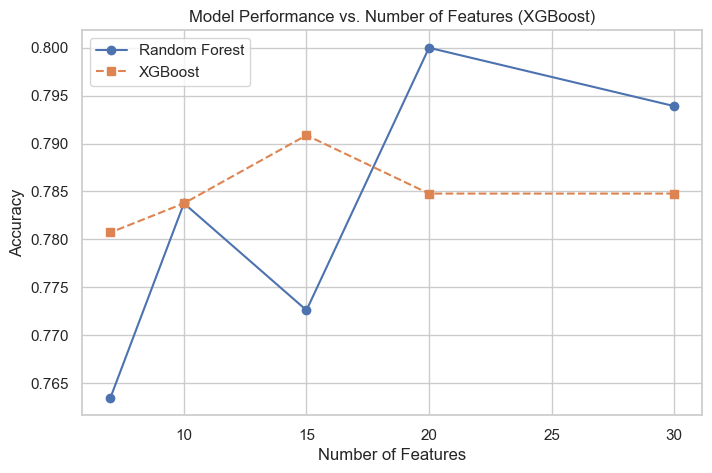

In [541]:
# Train XGBoost to get feature importance
xgb_full = XGBClassifier(n_estimators=100, random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_full.fit(train_telc1, TARGET)

# Extract feature importances from XGBoost
feature_importance_xgb = pd.DataFrame({'Feature': train_telc1.columns, 'Importance': xgb_full.feature_importances_})
feature_importance_xgb = feature_importance_xgb.sort_values(by="Importance", ascending=False)

# Debugging: Check if feature importance from XGBoost is correct
print("Feature Importance (XGBoost):\n", feature_importance_xgb.head(10))

# Define feature selection thresholds
top_n_list = [30, 20, 15, 10, 7]  
resultsXGB = []  # Initialize outside loop

for num_features in top_n_list:
    top_features = feature_importance_xgb.head(num_features)['Feature'].tolist()
    train_subset = train_telc1[top_features]

    # Debugging: Check selected features
    print(f"Top {num_features} features (XGBoost): {top_features}")
    print(f"Shape of train_subset: {train_subset.shape}")

    # Train-Test Split (80:20)
    X_train, X_test, y_train, y_test = train_test_split(train_subset, TARGET, test_size=0.2, random_state=42, stratify=TARGET)

    # Debugging: Check train-test split sizes
    print(f"Train size: {X_train.shape}, Test size: {X_test.shape}")

    # Train XGBoost
    xgb = XGBClassifier(n_estimators=100, random_state=42, use_label_encoder=False, eval_metric='logloss')
    xgb.fit(X_train, y_train)
    xgb_pred = xgb.predict(X_test)
    xgb_acc = accuracy_score(y_test, xgb_pred)

    # Train Random Forest
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)
    rf_pred = rf.predict(X_test)
    rf_acc = accuracy_score(y_test, rf_pred)

    # Debugging: Check model results before appending
    print(f"Num Features: {num_features}, RF Accuracy: {rf_acc}, XGB Accuracy: {xgb_acc}")

    # Append results
    resultsXGB.append([num_features, rf_acc, xgb_acc])

# Convert results to DataFrame
results_df_xgb = pd.DataFrame(resultsXGB, columns=['Num_Features', 'RF_Accuracy', 'XGB_Accuracy'])
print(results_df_xgb)  # Check if DataFrame is empty

# Plot accuracy vs. number of features for XGBoost
plt.figure(figsize=(8,5))
plt.plot(results_df_xgb['Num_Features'], results_df_xgb['RF_Accuracy'], marker='o', linestyle='-', label='Random Forest')
plt.plot(results_df_xgb['Num_Features'], results_df_xgb['XGB_Accuracy'], marker='s', linestyle='--', label='XGBoost')
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.title('Model Performance vs. Number of Features (XGBoost)')
plt.legend()
plt.show()


### Hyperparameter Tuning - XG Boost

In [543]:
# Select top N features from feature importance (example: top 20)
top_features = feature_importance_xgb.head(30)['Feature'].tolist()
X_train_sub = train_telc1[top_features]
X_train, X_test, y_train, y_test = train_test_split(X_train_sub, TARGET, test_size=0.2, random_state=42, stratify=TARGET)

# Define hyperparameters grid for XGBoost
param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}

# Initialize XGBoost model
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Set up GridSearchCV
grid_search_xgb = GridSearchCV(estimator=xgb, param_grid=param_grid_xgb, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit the model to the data
grid_search_xgb.fit(X_train, y_train)

# Get the best parameters and best score
print("Best Parameters (XGBoost):", grid_search_xgb.best_params_)
print("Best Accuracy (XGBoost):", grid_search_xgb.best_score_)

# Evaluate the best model on the test set
best_xgb = grid_search_xgb.best_estimator_
xgb_pred = best_xgb.predict(X_test)
xgb_acc_tuned = accuracy_score(y_test, xgb_pred)
print(f"Tuned XGBoost Accuracy: {xgb_acc_tuned:.4f}")


Fitting 5 folds for each of 729 candidates, totalling 3645 fits
Best Parameters (XGBoost): {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 5, 'n_estimators': 50, 'subsample': 0.8}
Best Accuracy (XGBoost): 0.8067105695986172
Tuned XGBoost Accuracy: 0.8061


## Neural Network

In [544]:
# Select top N features (e.g., top 20 features from feature importance)
top_featuresNN = feature_importance.head(20)['Feature'].tolist()
Xnn = train_telc1[top_features]
ynn = TARGET

In [545]:
# Split the data into train and test sets (80:20)
Xnn_train, Xnn_test, ynn_train, ynn_test = train_test_split(Xnn, ynn, test_size=0.2, random_state=42, stratify=ynn)

In [546]:
# Normalize the data (Neural Networks work better with normalized features)
scaler = StandardScaler()
Xnn_train_scaled = scaler.fit_transform(Xnn_train)
Xnn_test_scaled = scaler.transform(Xnn_test)

c:\Users\Utkarsh Singh\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/100
124/124 - 2s - 15ms/step - accuracy: 0.7795 - loss: 0.4521 - val_accuracy: 0.7990 - val_loss: 0.4147
Epoch 2/100
124/124 - 0s - 2ms/step - accuracy: 0.7993 - loss: 0.4195 - val_accuracy: 0.7990 - val_loss: 0.4119
Epoch 3/100
124/124 - 0s - 2ms/step - accuracy: 0.8001 - loss: 0.4163 - val_accuracy: 0.8071 - val_loss: 0.4098
Epoch 4/100
124/124 - 0s - 2ms/step - accuracy: 0.7993 - loss: 0.4090 - val_accuracy: 0.8122 - val_loss: 0.4091
Epoch 5/100
124/124 - 0s - 2ms/step - accuracy: 0.8031 - loss: 0.4064 - val_accuracy: 0.8112 - val_loss: 0.4106
Epoch 6/100
124/124 - 0s - 2ms/step - accuracy: 0.8052 - loss: 0.4288 - val_accuracy: 0.8122 - val_loss: 0.4060
Epoch 7/100
124/124 - 0s - 2ms/step - accuracy: 0.8049 - loss: 0.4026 - val_accuracy: 0.8132 - val_loss: 0.4062
Epoch 8/100
124/124 - 0s - 2ms/step - accuracy: 0.8082 - loss: 0.3972 - val_accuracy: 0.8162 - val_loss: 0.4091
Epoch 9/100
124/124 - 0s - 2ms/step - accuracy: 0.8085 - loss: 0.3986 - val_accuracy: 0.8041 - val_loss

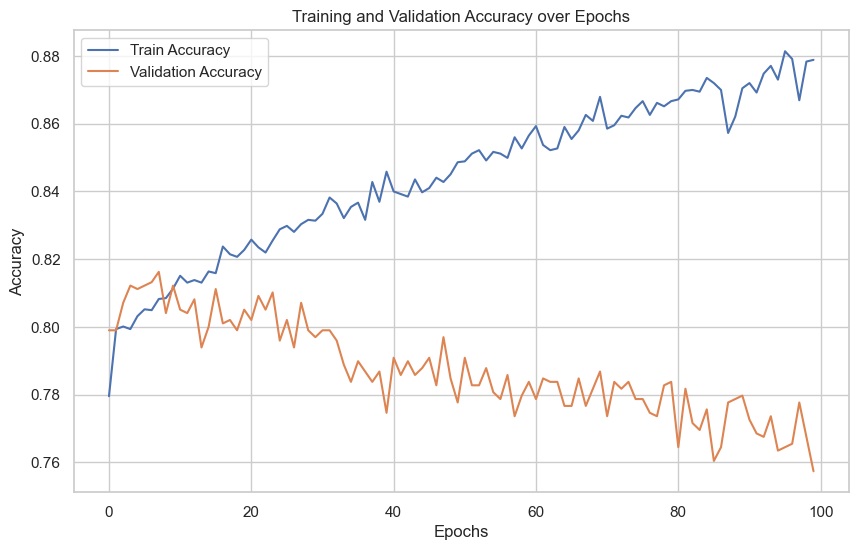

In [547]:
# Define the Neural Network model
model = Sequential()

# Add the input layer (input shape should match the number of features)
model.add(Dense(units=32, activation='relu', input_dim=Xnn_train_scaled.shape[1]))

# Add hidden layers
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=16, activation='relu'))

# Add output layer (since this is a binary classification task, use sigmoid activation)
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model (binary crossentropy loss for binary classification)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(Xnn_train_scaled, ynn_train, epochs=100, batch_size=32, validation_data=(Xnn_test_scaled, ynn_test), verbose=2)

# Evaluate the model
y_pred_nn = model.predict(Xnn_test_scaled)
y_pred_nn = (y_pred_nn > 0.5)  # Convert probabilities to binary predictions (0 or 1)

# Calculate accuracy
nn_acc = accuracy_score(ynn_test, y_pred_nn)
nn_precision = precision_score(ynn_test, y_pred_nn)
nn_recall = recall_score(ynn_test, y_pred_nn)
nn_f1 = f1_score(ynn_test, y_pred_nn)
#nn_roc_auc = roc_auc_score(ynn_test, y_pred_proba)

print(f"Neural Network Accuracy: {nn_acc:.4f}")
print(f"Neural Network Precision: {nn_precision:.4f}")
print(f"Neural Network Recall: {nn_recall:.4f}")
print(f"Neural Network F1-score: {nn_f1:.4f}")
#print(f"Neural Network ROC AUC: {nn_roc_auc:.4f}")

plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy over Epochs')
plt.legend()
plt.show()

## Evaluating the Models


Random Forest Evaluation:
              precision    recall  f1-score   support

           0       0.84      0.83      0.84       723
           1       0.55      0.57      0.56       262

    accuracy                           0.76       985
   macro avg       0.70      0.70      0.70       985
weighted avg       0.77      0.76      0.76       985



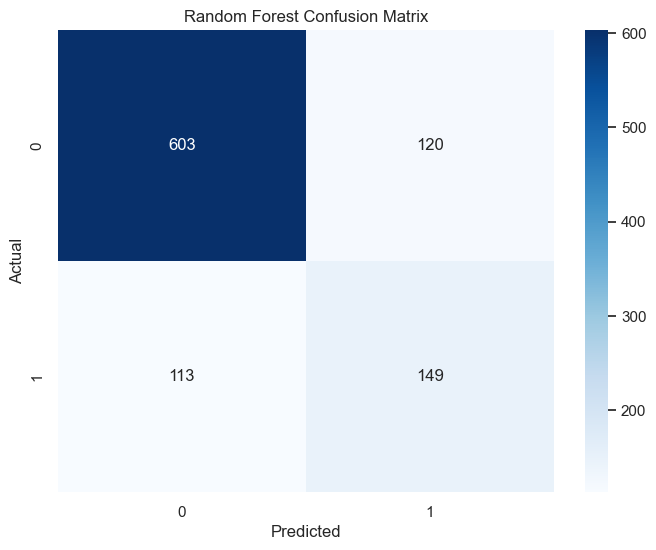


XGBoost Evaluation:
              precision    recall  f1-score   support

           0       0.85      0.90      0.87       723
           1       0.67      0.55      0.60       262

    accuracy                           0.81       985
   macro avg       0.76      0.72      0.74       985
weighted avg       0.80      0.81      0.80       985



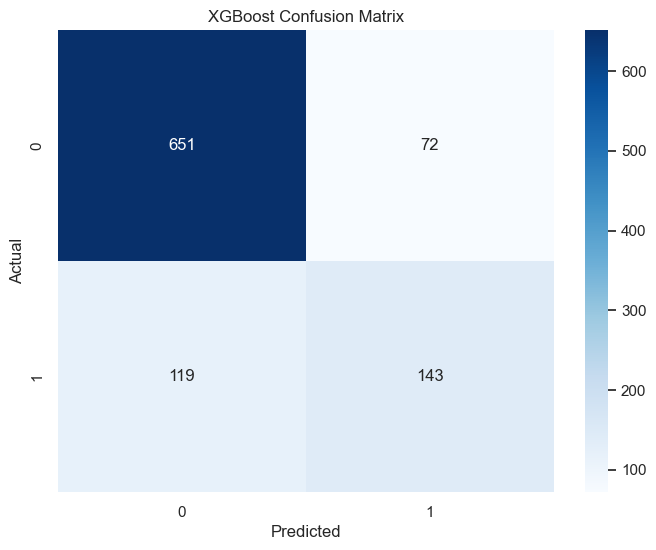


Neural Network Evaluation:
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       723
           1       0.55      0.47      0.51       262

    accuracy                           0.76       985
   macro avg       0.68      0.66      0.67       985
weighted avg       0.75      0.76      0.75       985



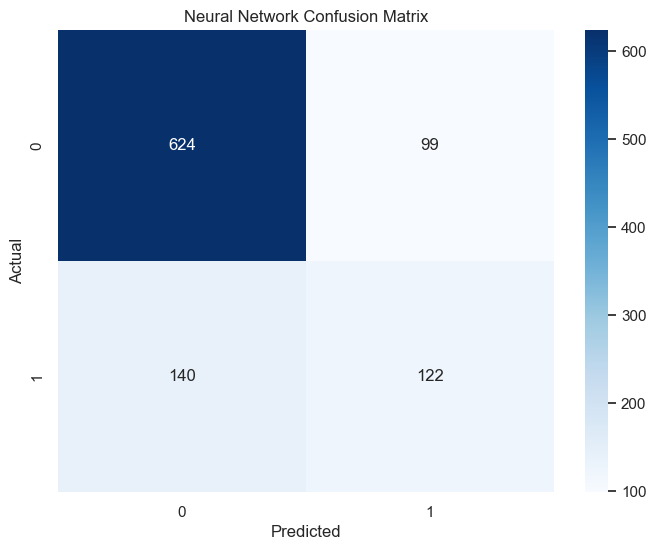

In [548]:
# Assuming you've stored predictions in these variables:
# rf_pred, xgb_pred, y_pred_nn

models = {
    'Random Forest': rf_pred,
    'XGBoost': xgb_pred,
    'Neural Network': y_pred_nn.flatten()  # Flatten in case it's 2D
}

for name, predictions in models.items():
    print(f"\n{name} Evaluation:")
    print(classification_report(y_test, predictions))
    
    cm = confusion_matrix(y_test, predictions)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{name} Confusion Matrix')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()


Based on the Confusion Matrix the best option seems to be the XG Boost model. There is also the case to be made that XGBoost and Random Forest also help in identifying the top features affecting the churn - whereas Neural Network does not. This can be very helpful in making the stake holders/ upper management understand the reasoning behind the churn of customers.

## Implementing the same Feature engineering on test_telc

In [549]:
# Create a new DataFrame (copy of the original)
test_telc = test_telc.copy()

In [550]:
#scaling values in MonthlyCharges and TotalCharges as range is different 
scaler = StandardScaler()
test_telc[['MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(test_telc[['MonthlyCharges', 'TotalCharges']])

In [551]:
# Copying CustomerID and saving it in a Dataframe
customer_id_df1 = test_telc[['customerID']].copy()
customer_id_df1

,customerID
4221,7926-IJOOU
1820,7554-AKDQF
2375,0013-SMEOE
5462,9289-LBQVU
1791,2348-KCJLT
...,...
4685,0345-XMMUG
4768,3996-ZNWYK
6150,5222-IMUKT
3234,8173-RXAYP


In [552]:
test_telc = test_telc.drop(columns=['PaperlessBilling','customerID','gender','PhoneService'])
test_telc

,SeniorCitizen,Has_Partner,Has_Dependents,account_tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4221,0,No,No,1,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Credit card (automatic),-1.529293,-1.001488,No
1820,0,Yes,No,6,No,DSL,No,No,No,No,No,No,Month-to-month,Mailed check,-0.641519,-0.865739,No
2375,1,Yes,No,71,No,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Bank transfer (automatic),1.516429,2.517729,No
5462,0,Yes,No,64,Yes,DSL,No,Yes,No,Yes,No,Yes,One year,Mailed check,0.183926,0.989727,No
1791,0,Yes,No,44,No,DSL,Yes,Yes,Yes,No,No,No,One year,Mailed check,-0.107507,0.204872,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4685,0,Yes,No,46,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,Credit card (automatic),1.489476,1.156473,No
4768,1,Yes,Yes,71,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Credit card (automatic),-1.512447,-0.390408,No
6150,0,No,No,32,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Electronic check,0.888081,0.271508,No
3234,0,Yes,Yes,24,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Mailed check,-1.515816,-0.808119,No


In [553]:
#using manual mapping for the above
payment_mapping = {
    'Electronic check': 4,
    'Credit card (automatic)': 3,
    'Bank transfer (automatic)': 2,
    'Mailed check': 1
}

test_telc['PaymentMethod'] = test_telc['PaymentMethod'].map(payment_mapping)
test_telc

,SeniorCitizen,Has_Partner,Has_Dependents,account_tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4221,0,No,No,1,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,3,-1.529293,-1.001488,No
1820,0,Yes,No,6,No,DSL,No,No,No,No,No,No,Month-to-month,1,-0.641519,-0.865739,No
2375,1,Yes,No,71,No,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,2,1.516429,2.517729,No
5462,0,Yes,No,64,Yes,DSL,No,Yes,No,Yes,No,Yes,One year,1,0.183926,0.989727,No
1791,0,Yes,No,44,No,DSL,Yes,Yes,Yes,No,No,No,One year,1,-0.107507,0.204872,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4685,0,Yes,No,46,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,3,1.489476,1.156473,No
4768,1,Yes,Yes,71,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,3,-1.512447,-0.390408,No
6150,0,No,No,32,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,4,0.888081,0.271508,No
3234,0,Yes,Yes,24,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,1,-1.515816,-0.808119,No


In [554]:
service_columns = ['InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Add the new columns to the new DataFrame
test_telc['numberofservices'] = test_telc[service_columns].apply(lambda x: (x == 'Yes').sum(), axis=1)
test_telc['HasPartnerOrDependents'] = ((test_telc['Has_Partner'] == 'Yes') | (test_telc['Has_Dependents'] == 'Yes')).astype(int)
test_telc['NewUser'] = (test_telc['account_tenure'] <= 6).astype(int)
test_telc['LongTermUser'] = (test_telc['account_tenure'] > 24).astype(int)
test_telc['MidTermUser'] = ((test_telc['account_tenure'] > 7) & (test_telc['account_tenure'] < 24)).astype(int)
# Check the new DataFrame
print(test_telc[['numberofservices', 'HasPartnerOrDependents', 'NewUser', 'LongTermUser','MidTermUser']].head())

      numberofservices  HasPartnerOrDependents  NewUser  LongTermUser  \
4221                 0                       0        1             0   
1820                 0                       1        1             0   
2375                 6                       1        0             1   
5462                 3                       1        0             1   
1791                 3                       1        0             1   

      MidTermUser  
4221            0  
1820            0  
2375            0  
5462            0  
1791            0  


In [555]:
test_telc = test_telc.drop(columns=['Has_Partner','Has_Dependents'])


In [556]:
test_telc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2110 entries, 4221 to 4451
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   SeniorCitizen           2110 non-null   int64  
 1   account_tenure          2110 non-null   int64  
 2   MultipleLines           2110 non-null   object 
 3   InternetService         2110 non-null   object 
 4   OnlineSecurity          2110 non-null   object 
 5   OnlineBackup            2110 non-null   object 
 6   DeviceProtection        2110 non-null   object 
 7   TechSupport             2110 non-null   object 
 8   StreamingTV             2110 non-null   object 
 9   StreamingMovies         2110 non-null   object 
 10  Contract                2110 non-null   object 
 11  PaymentMethod           2110 non-null   int64  
 12  MonthlyCharges          2110 non-null   float64
 13  TotalCharges            2110 non-null   float64
 14  Churn                   2110 non-null   ob

In [557]:
test_telc = pd.get_dummies(test_telc, drop_first=True, dtype=int)
test_telc

,SeniorCitizen,account_tenure,PaymentMethod,MonthlyCharges,TotalCharges,numberofservices,HasPartnerOrDependents,NewUser,LongTermUser,MidTermUser,...,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,Churn_Yes
4221,0,1,3,-1.529293,-1.001488,0,0,1,0,0,...,0,1,0,1,0,1,0,0,0,0
1820,0,6,1,-0.641519,-0.865739,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2375,1,71,2,1.516429,2.517729,6,1,0,1,0,...,1,0,1,0,1,0,1,0,1,0
5462,0,64,1,0.183926,0.989727,3,1,0,1,0,...,0,0,1,0,0,0,1,1,0,0
1791,0,44,1,-0.107507,0.204872,3,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4685,0,46,3,1.489476,1.156473,5,1,0,1,0,...,1,0,1,0,1,0,1,0,1,0
4768,1,71,3,-1.512447,-0.390408,0,1,0,1,0,...,0,1,0,1,0,1,0,0,1,0
6150,0,32,4,0.888081,0.271508,2,0,0,1,0,...,0,0,0,0,1,0,1,0,0,0
3234,0,24,1,-1.515816,-0.808119,0,1,0,0,0,...,0,1,0,1,0,1,0,0,1,0


In [558]:
test_telc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2110 entries, 4221 to 4451
Data columns (total 29 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeniorCitizen                         2110 non-null   int64  
 1   account_tenure                        2110 non-null   int64  
 2   PaymentMethod                         2110 non-null   int64  
 3   MonthlyCharges                        2110 non-null   float64
 4   TotalCharges                          2110 non-null   float64
 5   numberofservices                      2110 non-null   int64  
 6   HasPartnerOrDependents                2110 non-null   int32  
 7   NewUser                               2110 non-null   int32  
 8   LongTermUser                          2110 non-null   int32  
 9   MidTermUser                           2110 non-null   int32  
 10  MultipleLines_No phone service        2110 non-null   int32  
 11  MultipleLines_Yes  

In [559]:
TARGET1 = test_telc[['Churn_Yes']].copy()
TARGET1

,Churn_Yes
4221,0
1820,0
2375,0
5462,0
1791,0
...,...
4685,0
4768,0
6150,0
3234,0


In [563]:
test_telc = test_telc.drop('Churn_Yes',axis = 1)
test_telc

,SeniorCitizen,account_tenure,PaymentMethod,MonthlyCharges,TotalCharges,numberofservices,HasPartnerOrDependents,NewUser,LongTermUser,MidTermUser,...,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year
4221,0,1,3,-1.529293,-1.001488,0,0,1,0,0,...,1,0,1,0,1,0,1,0,0,0
1820,0,6,1,-0.641519,-0.865739,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2375,1,71,2,1.516429,2.517729,6,1,0,1,0,...,0,1,0,1,0,1,0,1,0,1
5462,0,64,1,0.183926,0.989727,3,1,0,1,0,...,0,0,0,1,0,0,0,1,1,0
1791,0,44,1,-0.107507,0.204872,3,1,0,1,0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4685,0,46,3,1.489476,1.156473,5,1,0,1,0,...,0,1,0,1,0,1,0,1,0,1
4768,1,71,3,-1.512447,-0.390408,0,1,0,1,0,...,1,0,1,0,1,0,1,0,0,1
6150,0,32,4,0.888081,0.271508,2,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
3234,0,24,1,-1.515816,-0.808119,0,1,0,0,0,...,1,0,1,0,1,0,1,0,0,1


In [565]:
# Ensure test data has the same features as training data
missing_cols = set(train_telc1.columns) - set(test_telc.columns)
for col in missing_cols:
    test_telc[col] = 0

# Align columns with training data
test_telc = test_telc[train_telc1.columns]


In [571]:
print(train_telc1.columns, test_telc.columns)

Index(['SeniorCitizen', 'account_tenure', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'numberofservices', 'HasPartnerOrDependents', 'NewUser',
       'LongTermUser', 'MidTermUser', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No internet service',
       'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year'],
      dtype='object') Index(['SeniorCitizen', 'account_tenure', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'numberofservices', 'HasPartnerOrDependents', 'NewUser',
       'LongTermUser', 'MidTermUser', 'MultipleLines_No phone service

In [572]:
test_telc = test_telc[top_features]

In [573]:
# Make predictions on the test set
xgb_predictions = best_xgb.predict(test_telc)
xgb_probabilities = best_xgb.predict_proba(test_telc)[:, 1]  # Probability of class 1 (churn)


Accuracy: 0.7919
Precision: 0.6386
Recall: 0.5009
F1 Score: 0.5614
ROC AUC: 0.8390


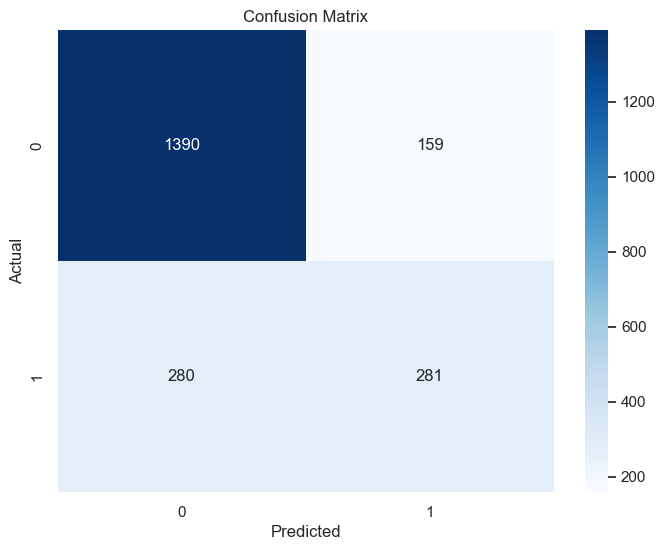

In [574]:
accuracy = accuracy_score(TARGET1, xgb_predictions)
precision = precision_score(TARGET1, xgb_predictions)
recall = recall_score(TARGET1, xgb_predictions)
f1 = f1_score(TARGET1, xgb_predictions)
roc_auc = roc_auc_score(TARGET1, xgb_probabilities)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

# Confusion Matrix
cm = confusion_matrix(TARGET1, xgb_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


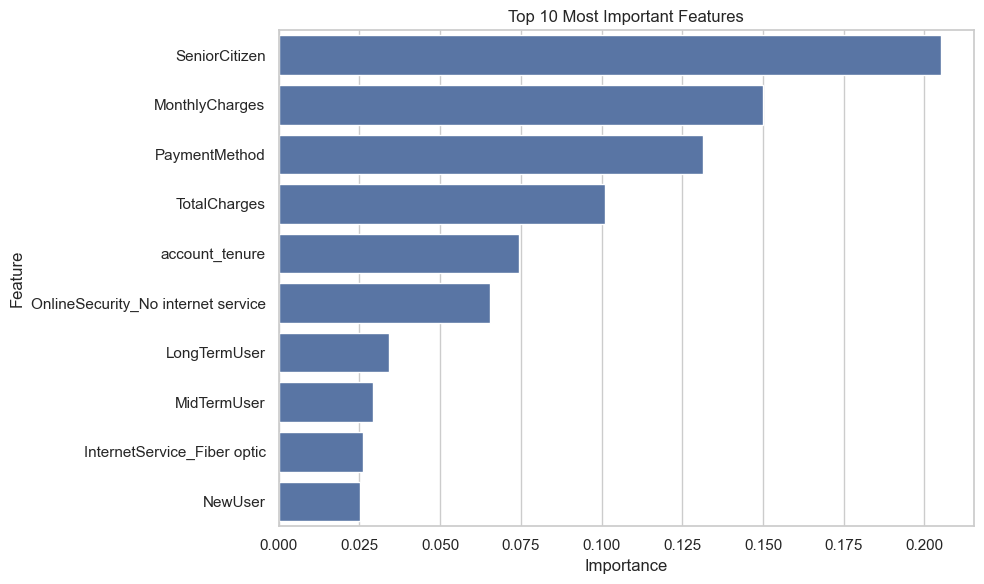

In [575]:
# Extract feature importance from XGBoost
feature_importance_df = pd.DataFrame({
    'Feature': train_telc1.columns,
    'Importance': best_xgb.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Finding the top 10 most important features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10))
plt.title('Top 10 Most Important Features')
plt.tight_layout()
plt.show()


In [576]:
final_results = pd.DataFrame({
    'CustomerID': customer_id_df1['customerID'],  
    'Churn_Prediction': xgb_predictions,
    'Churn_Probability': xgb_probabilities
})

# Save to CSV for stakeholders or further analysis
final_results.to_csv('final_churn_predictions.csv', index=False)
print("Final results saved to 'final_churn_predictions.csv'")


Final results saved to 'final_churn_predictions.csv'
